1. Elabore un diagrama t vs x con los datos de las recolecciones del registro que se muestra en la figura. Suponga que el registro es de capas horizontales. Determine el número de capas presentes, y las velocidades y el espesor de cada una (hasta donde sea posible).

In [1]:
t = [23, 33, 40, 47, 54, 60, 67, 70, 72, 74,78, 80, 84] #tiempo de llegada a los geófonos (en ms)
d = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125] #distancia de los geófonos al shotpoint (en m)

In [2]:
import matplotlib.pyplot as plt #importo la libreria para graficar
import numpy as np
import pandas as pd

In [3]:
df=pd.DataFrame({'Distancia':d, 'Tiempo':t})
df.set_index('Tiempo', inplace=True)
df


,Distancia
Tiempo,
23,5
33,15
40,25
47,35
54,45
60,55
67,65
70,75
72,85


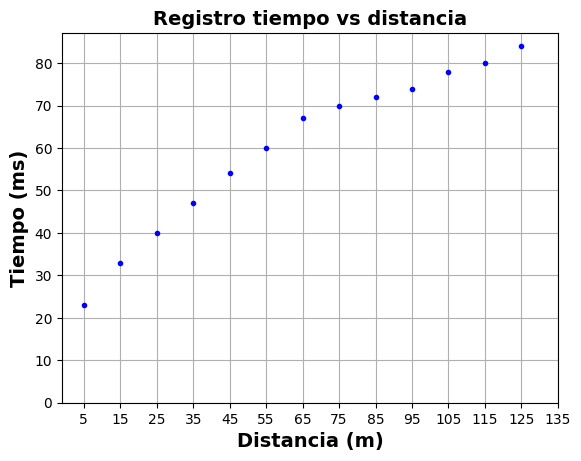

In [4]:
plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

plt.plot(d,t, marker='.', linestyle = '', color='blue')

plt.xticks(np.arange(5, 140, step=10))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))
plt.yticks(np.arange(0, 90, step=10))
plt.grid('true')

plt.show()


En la grafica se pueden observan dos tendencias predominantes (dos cambios de pendiente) que sugieren, que una vez llegado el rayo a la frontera, este se refractó cíticamente y generó nuevas fuentes puntuales de ondas secundarías que se refractarían con el mismo ángulo con el que incidió el primer rayo, pero en durección hacia la superficie. Debido a que en el registro solo se observan dos cambios notorios, esto es indicativo de que el ensayo sólo identificó una frontera.

Every single source of information keeps the rate of changing quite closely for each tendence. Therefore, this information suggest that each tendece can be aproximated to a line. Thus two tendences implies two lines.

Let's proceed to make a linear regression taking each tendency with its corresponding data.

In [5]:
dwt = t[0:7] #Tomo un rango de la lista t (direct wave tiem = dwt)
dwd = d[0:7] #Tomo un rango de la lista d (direct wave distnace = dwd)
cwt = t[6:13] #Tomo un rango de la lista t (critic refracted wave tiem = cwt)
cwd = d[6:13] #Tomo un rango de la lista d (critic refracted distnace = cwd)

print(dwt, dwd, cwt, cwd)


[23, 33, 40, 47, 54, 60, 67] [5, 15, 25, 35, 45, 55, 65] [67, 70, 72, 74, 78, 80, 84] [65, 75, 85, 95, 105, 115, 125]


In [6]:
from spicy import stats

# Realiza una regresión lineal para el primer par de datos (X,Y)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(dwd,dwt) 

# Realiza una regresión lineal para el segundo par de datos
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(cwd, cwt)

print(intercept2)

48.875


In [7]:
dwt1 = np.array(t[0:7]) #Tomo un rango de la lista t (direct wave tiem = dwt)
dwd1 = np.array(d[0:7]) #Tomo un rango de la lista d (direct wave distnace = dwd)
cwt1 = np.array(t[6:13]) #Tomo un rango de la lista t (critic refracted wave tiem = cwt)
cwd1 = np.array(d[6:13]) #Tomo un rango de la lista d (critic refracted distnace = cwd)

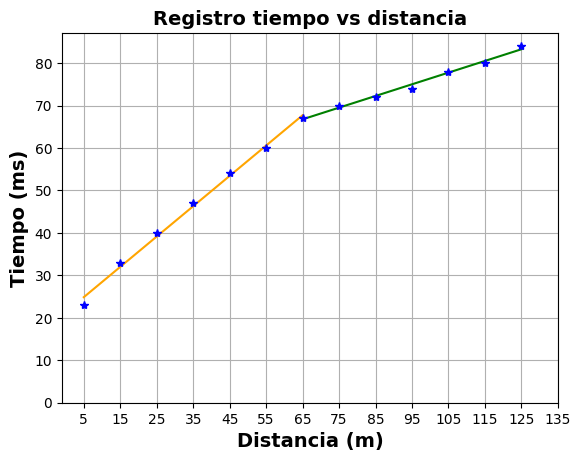

In [8]:
# y = mx + b , where m = slope1 and, b = intercept1

#The following is the line's equation for the direct wave
y1= slope1*dwd1 + intercept1
plt.plot(dwd1, y1, color="orange", label="Recta de Regresión")

#The following is the line's equation for the critical refracted wave
y2= slope2*cwd1 + intercept2
plt.plot(cwd1, y2, color="green", label="Recta de Regresión")

# Graphic
plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

plt.plot(d,t, marker='*', linestyle = '', color='blue')

plt.xticks(np.arange(5, 140, step=10))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))
plt.yticks(np.arange(0, 90, step=10))
plt.grid('true')

plt.show()

In [9]:
#Pendiente e intersección de la onda directa
print('Direct wave slope(m1):', round(slope1,3),'ms/m')
print('Direct wave intercept (t01):', round(intercept1,3),'ms')
print()
print('Critically refracted slope wave(m2):', round(slope2,3),'ms/m')
print('Critically refracted intercept wave (t02):', round(intercept2,3),'ms')

Direct wave slope(m1): 0.714 ms/m
Direct wave intercept (t01): 21.286 ms

Critically refracted slope wave(m2): 0.275 ms/m
Critically refracted intercept wave (t02): 48.875 ms


Como la pendiente es igual al inverso de la velocidad, ésta se debe despejar para conocer la velocidad de ambos tramos

In [10]:
#Direct wave velocity
vel1=round((1/slope1),3)

#Critically refracted wave velocity
vel2=round((1/slope2),3)

print('Direct wave velocity:', vel1, 'm/ms')
print()
print('Critically refracted wave velocity:', vel2,'m/ms')



Direct wave velocity: 1.4 m/ms

Critically refracted wave velocity: 3.636 m/ms


Se hace uso de la ley de Snell para saber el ángulo crítico al cual se refractó la onda

Seni1 = vel1/vel2

In [11]:
#i1 es el ángulo de refracción crítico.
i1 = np.arcsin(vel1/vel2)
print('Álgulo crítico de refracción:',round(np.degrees(i1),3),'°',sep=' ')  

Álgulo crítico de refracción: 22.646 °


Los tiempos de llegada de las ‘head-waves’ generadas por las ondas que se
refractan críticamente en la frontera, hasta la superficie, se predicen con la siguiente
ecuación:

t=x/vel2 + (2h1cosi1)/v1
t0 = intercepto con y
h1 = (t0*vel1)/(2*cosi1)


In [12]:
h1 = (intercept2*vel1)/(2*(np.cos(i1)))
print('Espesor del estrato:',round(h1,3),'m',sep=' ') 


Espesor del estrato: 37.071 m
